<a href="https://colab.research.google.com/github/davidgonmar/miscellanea/blob/main/metropolis-hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import scipy.stats as st
import numpy as np

In [11]:
def prior(p):
  return st.uniform.pdf(p, loc=0, scale=1)

In [12]:
def likelihood(p, observation, n):
  return st.binom.pmf(observation, n=n, p=p)

In [21]:
p = np.random.uniform(0, 1)
results = []
burn_in = 1000
lag = 5
coinflip = 59
for i in range(100000):
    new_p = np.random.uniform(0, 1)
    acc_ratio = likelihood(new_p, coinflip, 100) / likelihood(p, coinflip, 100) * prior(new_p) / prior(p)
    if acc_ratio > np.random.uniform(0, 1):
      p = new_p
    if i > burn_in and i % lag == 0:
      results.append(p)

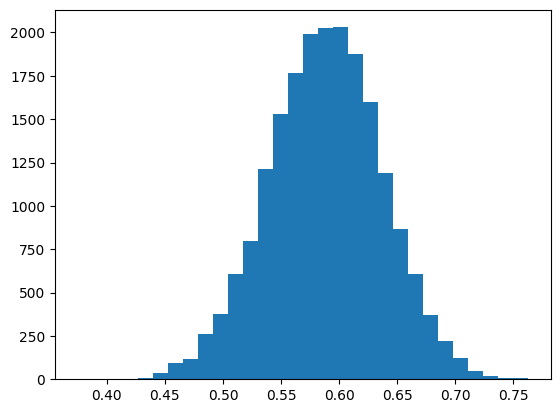

In [23]:
import matplotlib.pyplot as plt

plt.hist(results, bins=30)
plt.show()
